person nr. 3
person nr. 6
person nr. 9
person nr. 12
person nr. 15
person nr. 18
person nr. 21


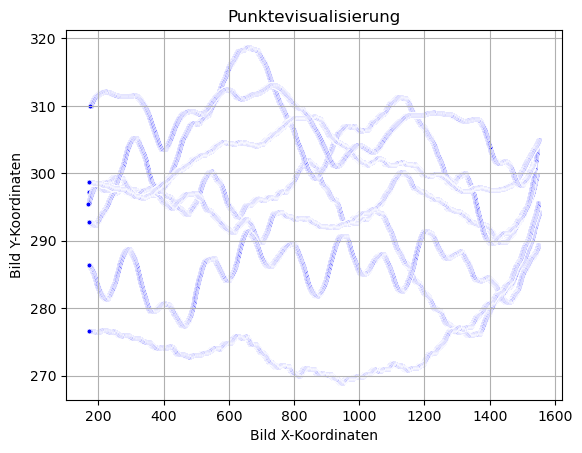

Weltkoordinaten: (-53500.0, -21000.0)
Bildkoordinaten: [  551.31893965 -2827.26192064]
Weltkoordinaten: (-45000.0, -13000.0)
Bildkoordinaten: [795.41280427 270.76658886]
Weltkoordinaten: (-42820.0, -14570.0)
Bildkoordinaten: [1506.45227576  320.48195232]
Weltkoordinaten: (-46970.0, -11420.0)
Bildkoordinaten: [124. 259.]
neu ----------
Weltkoordinaten: (-44110.0, -13400.0)
Bildkoordinaten: [1042.55776926  340.6187896 ]
Weltkoordinaten: (-44360.0, -13710.0)
Bildkoordinaten: [1048.75379293  234.1365872 ]
done


In [50]:
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os

image1 = Image.open('../../Bruecke1_top.png')
image2 = Image.open('../../Bruecke2_top.png')

idsReference = [1,4,7,10,13,16,19] #broken runs 22
idsVirtual = [2,8,11,17,20,24,25] #broken runs 5,14
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23,26

# Stützpunkte in Weltkoordinaten
welt_stuetzpunkte_1 = np.array([[-47980.0, -11840.0],
                               [-41990.0, -14100.0],
                               [-46970.0, -11420.0]], dtype=np.float32)

# Stützpunkte in Bildkoordinaten
bild_stuetzpunkte_1 = np.array([[0, 0],
                               [1586, 559],
                               [124, 259]], dtype=np.float32)

# Stützpunkte in Weltkoordinaten für die zweite Transformation
welt_stuetzpunkte_2 = np.array([[-53840.0, -18720.0],
                                [-52990.0, -25070.0],
                                [-54110.0, -18770.0]])
# Stützpunkte in Bildkoordinaten für die zweite Transformation
bild_stuetzpunkte_2 = np.array([[1643, 242],
                                [41, 309],
                                [1645, 309]])


def weltkoordinaten_zu_bildkoordinaten(x_welt, y_welt, A):
    welt_koordinaten = np.array([[x_welt, y_welt]])
    bild_koordinaten = cv2.transform(np.array([welt_koordinaten]), A)
    bild_koordinaten = np.squeeze(bild_koordinaten)
    return bild_koordinaten

#Bild 1:
#Koordinate Nr. 1:
#Welt: (X=-42820.0,Y=-14570.0)
#Bild: (x = 1511, y = 339)
#Koordinate Nr. 2:
#Welt: (X=-46970.0,Y=-11420.0)
#Bild: (x = 124, y = 259)
#Koordinate Nr. 3:
#Welt: (X=-46790.0,Y=-11210.0)
#Bild: (x = 121, y = 335)

#Bild 2:
#Koordinate Nr. 1:
#Welt: (X=-53840.0,Y=-18720.0)
#Bild: (x = 1643, y = 242)
#Koordinate Nr. 2:
#Welt: (X=-52990.0,Y=-25070.0)
#Bild: (x = 41, y = 309)
#Koordinate Nr. 3:
#Welt: (X=-54110.0,Y=-18770.0)
#Bild: (x = 1645, y = 309)

def readData(ids, image, A):
    width, height = image.size
    draw = ImageDraw.Draw(image)

    for n in ids:
        print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        #print(df[['TS_VRActor_Actor_loc_x','TS_VRActor_Actor_loc_y']])
        df['bild_x'], df['bild_y'] = zip(*df.apply(lambda row: weltkoordinaten_zu_bildkoordinaten(row['TS_VRActor_Actor_loc_x'], row['TS_VRActor_Actor_loc_y'], A), axis=1))
        #print(df[['bild_x','bild_y']])

        #plt.figure(figsize=(8, 8))  # Festlegen der Größe des Plots

        # Hier verwenden wir sns.scatterplot und geben die Spalten 'bild_x' und 'bild_y' an
        startBridge_1_df = df.groupby(['TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status'])
        for group_value, group_data in startBridge_1_df:
            if group_value == (True, False): #Begin of Bridge triggered, but end not
                #print(group_data[['bild_x','bild_y']])
                #starttime = group_data['TimeStamp_Unix'].min()
                #sns.scatterplot(x='TS_VRActor_Actor_loc_x', y='TS_VRActor_Actor_loc_y', data=group_data, color='blue', marker='.', s=50)
                sns.scatterplot(x='bild_x', y='bild_y', data=group_data, color='blue', marker='.', s=50)

    # Festlegen von Titel und Achsentiteln
    plt.title('Punktevisualisierung')
    plt.xlabel('Bild X-Koordinaten')
    plt.ylabel('Bild Y-Koordinaten')

    # Optional: Zeigen Sie das Gitter im Diagramm an
    plt.grid(True)

    # Anzeigen des Plots
    plt.show()
        
                #sns.scatterplot(x='TS_VRActor_Actor_loc_x', y='TS_VRActor_Actor_loc_y', data=df, color='blue', marker='.', s=50)  # Passen Sie Farbe, Marker und Größe an
                #sns.scatterplot(x='bild_x', y='bild_y', data=group_data, color='blue', marker='.', s=50)  # Passen Sie Farbe, Marker und Größe an

                # Festlegen von Titel und Achsentiteln
                #plt.title('Punktevisualisierung')
                #plt.xlabel('Bild X-Koordinaten')
                #plt.ylabel('Bild Y-Koordinaten')

                # Optional: Zeigen Sie das Gitter im Diagramm an
                #plt.grid(True)

                # Anzeigen des Plots
                #plt.show()
                
                #asdf = 0
                #for index, row in group_data.iterrows():
                #    x, y = int(row['bild_x']), int(row['bild_y'])
                #    asdf = asdf + 1
                #    if 0 <= x < width and 0 <= y < height:
                #        draw.point((x, y), fill="blue")
                        #if asdf == 100:
                        #    break
                #image.save("ausgabe.png")
    #image.show()
        
        #draw.line((row['x1'], row['y1'], row['x2'], row['y2']), fill=(0, 0, 0), width=25)

def bildUpdaten(image, welt_stuetzpunkte, bild_stuetzpunkte):
    # Berechnung der affinen Transformation
    #A, residuals, rank, s = np.linalg.lstsq(welt_stuetzpunkte, bild_stuetzpunkte, rcond=None)
    A = cv2.getAffineTransform(welt_stuetzpunkte_1, bild_stuetzpunkte_1)

    #readData(idsReference, image, A)
    #readData(idsVirtual, image, A)
    readData(idsHaptic, image, A)

    # Beispiel: Umrechnung der Weltkoordinaten (-45000.0, -13000.0) in Bildkoordinaten
    x_welt = -53500.0#-45000.0
    y_welt = -21000.0#-13000.0
    bild_koordinaten = weltkoordinaten_zu_bildkoordinaten(x_welt, y_welt, A)
    print("Weltkoordinaten:", (x_welt, y_welt))
    print("Bildkoordinaten:", bild_koordinaten)
    #Welt: (X=-42820.0,Y=-14570.0)
    #Welt: (X=-46970.0,Y=-11420.0)
    
    x_welt = -45000.0
    y_welt = -13000.0
    bild_koordinaten = weltkoordinaten_zu_bildkoordinaten(x_welt, y_welt, A)
    print("Weltkoordinaten:", (x_welt, y_welt))
    print("Bildkoordinaten:", bild_koordinaten)

    x_welt = -42820.0
    y_welt = -14570.0
    bild_koordinaten = weltkoordinaten_zu_bildkoordinaten(x_welt, y_welt, A)
    print("Weltkoordinaten:", (x_welt, y_welt))
    print("Bildkoordinaten:", bild_koordinaten)
    
    x_welt = -46970.0
    y_welt = -11420.0
    bild_koordinaten = weltkoordinaten_zu_bildkoordinaten(x_welt, y_welt, A)
    print("Weltkoordinaten:", (x_welt, y_welt))
    print("Bildkoordinaten:", bild_koordinaten)
    
    
    print('neu ----------')
    x_welt=-44110.000000
    y_welt=-13400.000000
    bild_koordinaten = weltkoordinaten_zu_bildkoordinaten(x_welt, y_welt, A)
    print("Weltkoordinaten:", (x_welt, y_welt))
    print("Bildkoordinaten:", bild_koordinaten)
    x_welt=-44360.000000
    y_welt=-13710.000000
    bild_koordinaten = weltkoordinaten_zu_bildkoordinaten(x_welt, y_welt, A)
    print("Weltkoordinaten:", (x_welt, y_welt))
    print("Bildkoordinaten:", bild_koordinaten)
    

bildUpdaten(image1, welt_stuetzpunkte_1, bild_stuetzpunkte_1)
#bildUpdaten(image2, welt_stuetzpunkte_2, bild_stuetzpunkte_2)

print('done')